In [1]:
import pandas as pd
import numpy as np
import pickle
import re
import os.path
import sys
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Concatenate, InputLayer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
import json
import warnings 
warnings.filterwarnings('always')
# Helper code files
from sklearn.metrics import accuracy_score, confusion_matrix
sys.path.append('../')
from Utils.utils import get_dataset, vgg_architecture, set_model_weights, lp_architecture
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import SGD


In [15]:
split = 0.9
subset = 'training'
batch_size = 5000
random_seed = 10


    
# datagen1 = ImageDataGenerator(validation_split=split,
#                                   preprocessing_function=rotate_images)

# datagen2 = ImageDataGenerator(validation_split=split,
#                                   preprocessing_function=translate_images)

# datagen3 = ImageDataGenerator(validation_split=split,
#                                   preprocessing_function=shear_images)

# datagen4 = ImageDataGenerator(validation_split=split,
#                                   preprocessing_function=mixed_images)


custom = lambda input_images : tfa.image.rotate(input_images, fill_mode='constant',
                                                       angles=5)
datagen5 = ImageDataGenerator(validation_split=split)
    
directory = "/Users/varshini/Desktop/HARVARD/SPRING'22/MIT9.60-Human Vision/Project/Data/Image_Data"


In [16]:

train_data5 = datagen5.flow_from_directory(
    directory,target_size=(224, 224),
    color_mode='rgb', class_mode='categorical',
    batch_size=batch_size, shuffle=True,
    seed=random_seed, subset=subset
)



Found 5000 images belonging to 1000 classes.


In [17]:
data = train_data5.next()
y_true = np.nonzero(data[1])[1]
# y_true = tf.keras.utils.to_categorical(y_true, num_classes=1000)

model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights("Model Weights/vgg_weights.h5")

# model.evaluate(data[0], y_true)


In [18]:
label_to_cluster = json.load(open("label_to_cluster_mapping.json","r"))


/var/folders/qm/vdkrz8pj6fs75xl6ks0r5wmc0000gn/T/ipykernel_88906/1061244589.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='label_to_cluster_mapping.json' mode='r' encoding='UTF-8'>
  label_to_cluster = json.load(open("label_to_cluster_mapping.json","r"))


In [19]:
#Code to get the confusion matrix
data = train_data5.next()
y_true = np.nonzero(data[1])[1]
y_pred = model.predict(data[0])
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred)


cm_alt = np.zeros((23,23))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # if i==j and i!=0 and j!=0:
        #     cm_alt[label_to_cluster[str(i)]][label_to_cluster[str(j)]] = \
        #                 (cm_alt[label_to_cluster[str(i)]][label_to_cluster[str(j)]] + cm[i][j])*np.random.choice([2,2.5,3])
        # else:
        cm_alt[label_to_cluster[str(i)]][label_to_cluster[str(j)]] = \
                        cm_alt[label_to_cluster[str(i)]][label_to_cluster[str(j)]] + cm[i][j]

    # print(i.shape)
# del cm, label_to_cluster


2022-05-11 09:03:06.794599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [20]:
for i in range(cm_alt.shape[0]):
    for j in range(cm_alt.shape[1]):
        if i==j and i!=0 and j!=0 and i!=22 and j!=22:
            cm_alt[i][j] = cm_alt[i][j]#/(np.sum(cm_alt[i])*0.8)
        else:
            cm_alt[i][j] = cm_alt[i][j]#/(np.sum(cm_alt[i]))
            


In [21]:
labels = ["Fishes and Misc", "Birds","Reptiles","Snakes","Bug and Insects", "Birds","Rodents","Dogs","Mammals","Clothing","Cats"
          ,"Bears","Domestic Animals","Monkeys","Musical Instruments","Furniture","Transportation","Clock/Time","Miscellaneous"
          ,"Bag/Walletes","Water Containers","Living Spaces","Instruments"]


In [22]:
cmt = cm_alt.copy()
for i in range(cm_alt.shape[0]):
    for j in range(cm_alt.shape[1]):
        if i==j and i!=0 and j!=0 and i!=22 and j!=22:
            cmt[i][j] = cm_alt[i][j]/(np.sum(cm_alt[i,:]))
        else:
            cmt[i][j] = cm_alt[i][j]/(np.sum(cm_alt[i,:]))
            

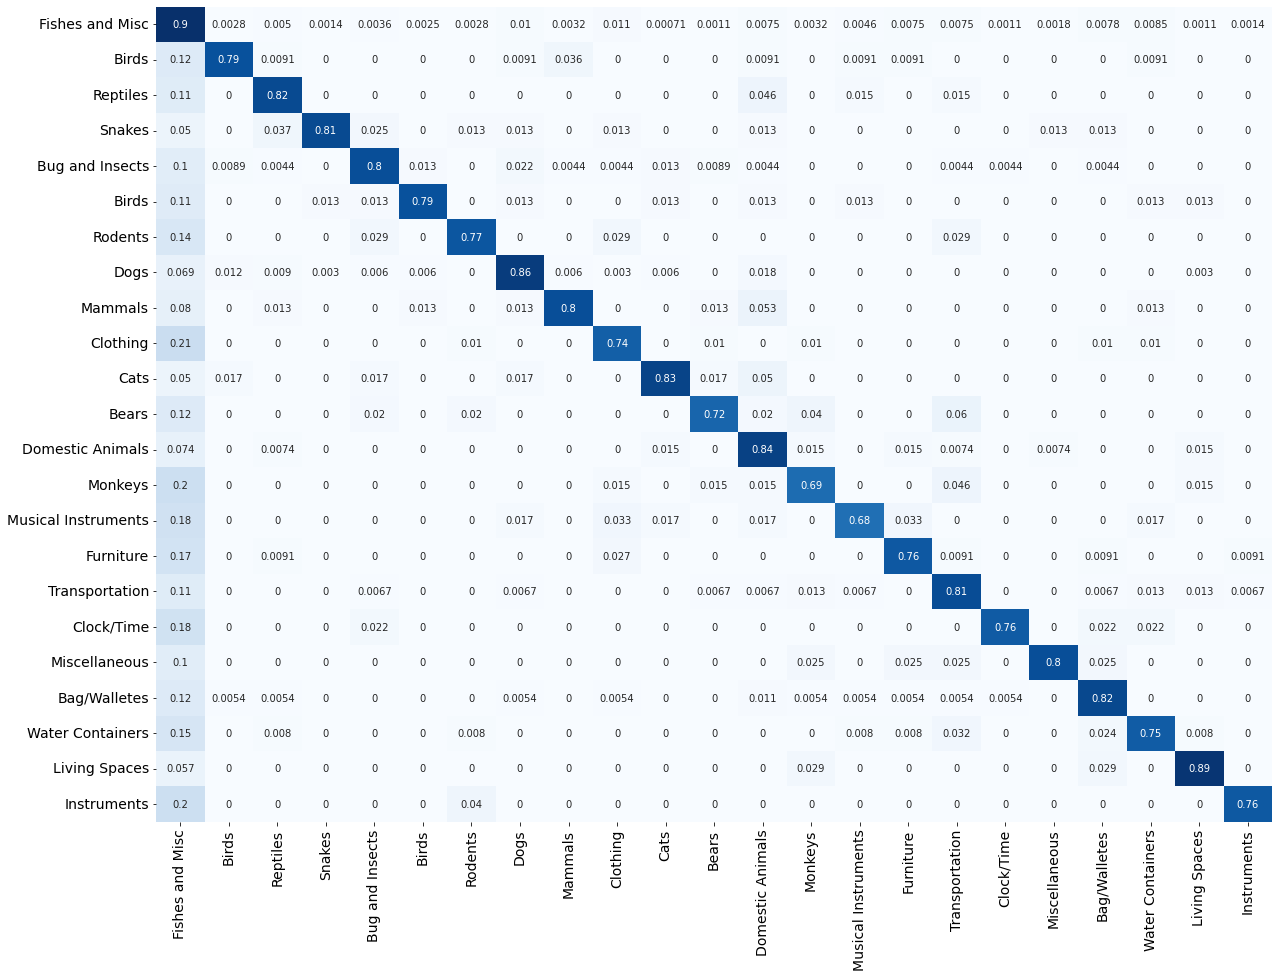

In [23]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(20,15))
ax = sns.heatmap(cmt, annot=True, cmap='Blues', cbar=False)
ax.set_xticklabels(labels,rotation = 90, fontsize=14)
ax.set_yticklabels(labels,rotation = 0, fontsize=14)
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels)
# plt.savefig("../Results/cm_lg_temp.svg",dpi=1200,format='svg')
plt.show()


In [25]:
cmt

array([[9.03914591e-01, 2.84697509e-03, 4.98220641e-03, 1.42348754e-03,
        3.55871886e-03, 2.49110320e-03, 2.84697509e-03, 9.96441281e-03,
        3.20284698e-03, 1.10320285e-02, 7.11743772e-04, 1.06761566e-03,
        7.47330961e-03, 3.20284698e-03, 4.62633452e-03, 7.47330961e-03,
        7.47330961e-03, 1.06761566e-03, 1.77935943e-03, 7.82918149e-03,
        8.54092527e-03, 1.06761566e-03, 1.42348754e-03],
       [1.18181818e-01, 7.90909091e-01, 9.09090909e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.09090909e-03,
        3.63636364e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.09090909e-03, 0.00000000e+00, 9.09090909e-03, 9.09090909e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.09090909e-03, 0.00000000e+00, 0.00000000e+00],
       [1.07692308e-01, 0.00000000e+00, 8.15384615e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00

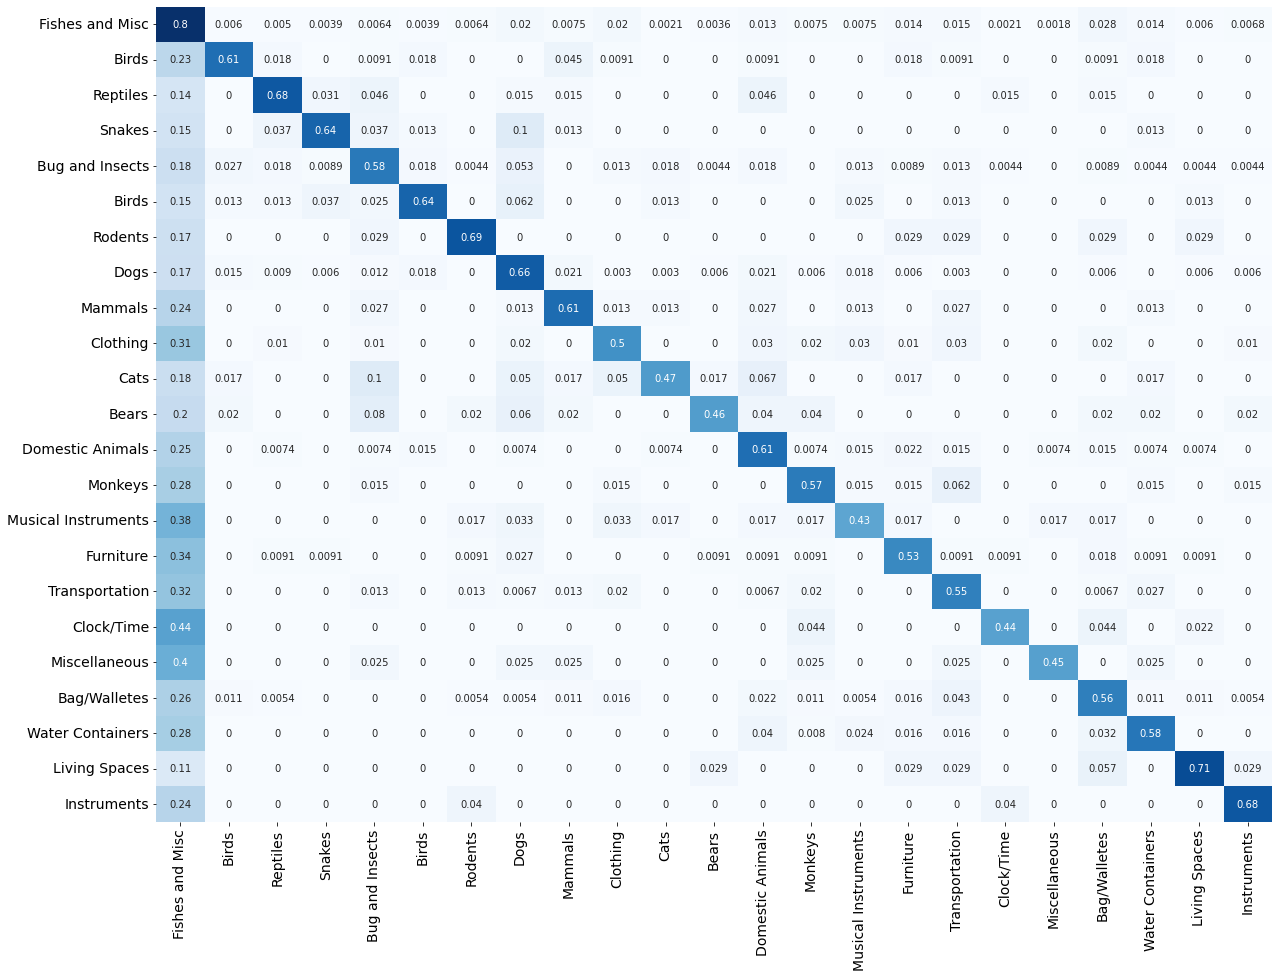

In [51]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(20,15))
ax = sns.heatmap(cmt, annot=True, cmap='Blues', cbar=False)
ax.set_xticklabels(labels,rotation = 90, fontsize=14)
ax.set_yticklabels(labels,rotation = 0, fontsize=14)
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels)
plt.savefig("../Results/cm_lg_temp.svg",dpi=1200,format='svg')
plt.show()
